# Gibbs Sampling: Draw Samples from Multivariate Distributions

## Preliminary: joint distributions, marginal distributions, and conditional distributions

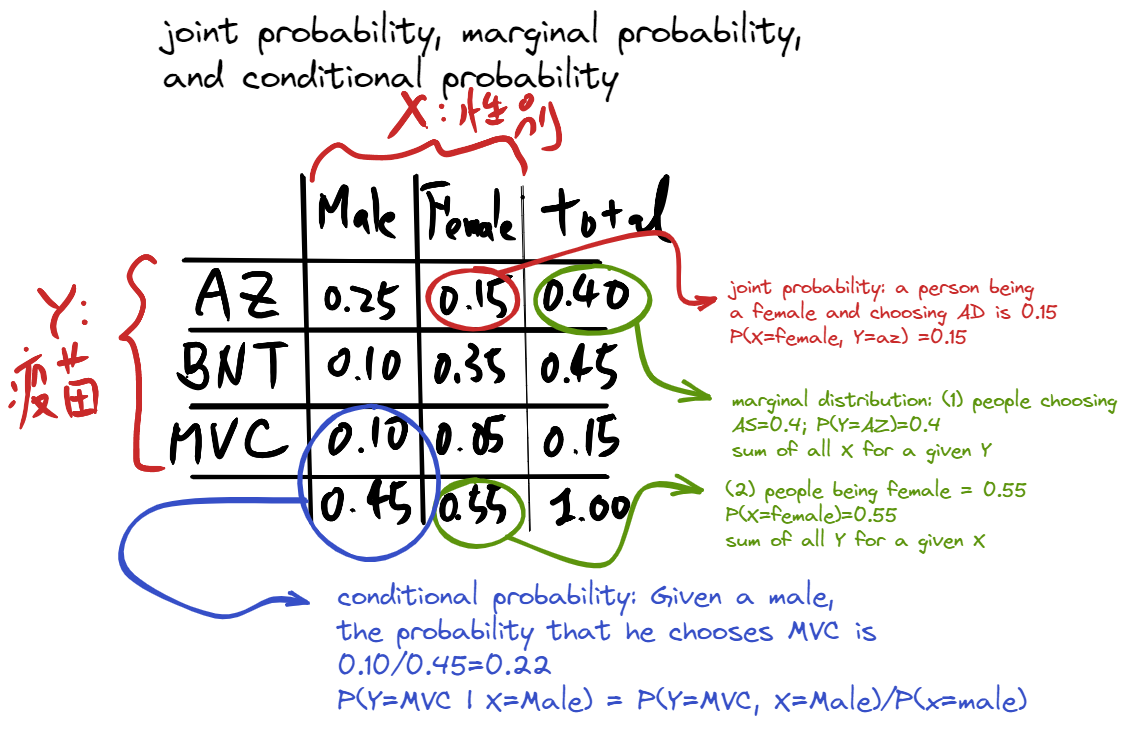


## Introduction of Gibbs Sampler

- To generate draws from a multivariate joint probability distribution, the Gibbs sampling use methods to sequentially sample from a series of conditional probability distributions on lower-dimensional subsets of the random variables


- It is often used when the joint distribution is not known explicitly or difficult to draw samples from directly (ex: multivariate distribution)


- The key of this method is to use a full set of conditional distributions, which is usually easier to draw samples from.

There are two necessary conditions for Gibbs sampling :
1. The full set of conditional distributions should be available in closed form.
2. The forms should be tractable in the sense that they are easy to draw samples from.

## How does it work

- How does the Gibbs sampling work? Suppose the joint distribution we want to draw samples from is $f(X,Y)$. Then:
1. We derive the full set of conditional distributions: $f_X(x|y)$ and $f_Y(y|x)$.
2. We draw samples from these two conditional distributions alternatively. 
- Step 1. Set initial values of $x$ and $y$: ------> $(x_0,y_0)$.
- Step 2. Sample $x_1$ from $f(X|Y=y_0)$ and then sample $y_1$ from $f(Y|X=x_1)$  ------> $(x_1,y_1)$.
- Step 3. Sample $x_2$ from $f(X|Y=y_1)$ and then sample $y_2$ from $f(Y|X=x_2)$  ------> $(x_2,y_2)$.
- Step 4. Repeat Step 2 and Step 3 for $n$ times.
- Step 5. Check the convergence of the sampler.

- We thus obtain a sequence of samples $\{(x_0, y_0), (x_1, y_1), (x_2, y_2), ...(x_n, y_n)\}$, and the distribution should converge to the targeted joint distribution.

- Note that it is likely that the starting values of $(x_0, y_0)$ are not optimal, leading to over-sampling regions that are actually of very low probability under the equilibrium distribution
- Thus in practice we often discard the first tens or hundreds of points in the collection. The technique is called **burn-in**.


> **Note**: 
> Every step which produces a new sample contains two steps: 1. move along the x-axiom 2. move along the y-axiom 
> $$\begin{equation} \boldsymbol{(x_0,y_0)} \rightarrow (x_1,y_0) \rightarrow \boldsymbol{(x_1,y_1)} \rightarrow (x_2,y_1) \rightarrow \boldsymbol{(x_2,y_2)} \end{equation}$$
> ![title](gibb_sample_1.png)




### The sequence is a Markov chain

- The procedure thus defines a sequence of pairs of random variables

$$\begin{equation} (x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3)... \end{equation}$$

- This sequence satisfies the property of a **Markov chain**: the probability of the current ($t$) event depends only on the state of the previous event ($t-1$)


- For the current example, it means that the conditional distribution of $(x_n,y_n)$ given the previous pairs $(x_0,y_0), (x_1,y_1), ..., (x_{n-1},y_{n-1})$ depends only on $(x_{n-1},y_{n-1})$
-  Because each draw depends on the previous draw, so they are not iid (independently and identically distributed). 


$$\begin{equation} p((x_n,y_n)|(x_0,y_0),(x_1,y_1),...,(x_{n-1},y_{n-1})) = p((x_n,y_n)|(x_{n-1},y_{n-1}))\end{equation}$$

- Because of this property, Gibbs sampling is a type of the **Markov Chain Monte Carlo (MCMC)** algorithms.



### Issues (copied)

There are two ways that Gibbs sampling may fail:

1. The first is when there are islands of high-probability states, with no paths between them. For example, consider a probability distribution over 2-bit vectors, where the vectors (0,0) and (1,1) each have probability ½, but the other two vectors (0,1) and (1,0) have probability zero. Gibbs sampling will become trapped in one of the two high-probability vectors, and will never reach the other one. More generally, for any distribution over high-dimensional, real-valued vectors, if two particular elements of the vector are perfectly correlated (or perfectly anti-correlated), those two elements will become stuck, and Gibbs sampling will never be able to change them.

2. The second problem can happen even when all states have nonzero probability and there is only a single island of high-probability states. For example, consider a probability distribution over 100-bit vectors, where the all-zeros vector occurs with probability $\frac{1}{2}$, and all other vectors are equally probable, and so have a probability of $\frac{1}{2(2^{100}-1)}$ each. If you want to estimate the probability of the zero vector, it would be sufficient to take 100 or 1000 samples from the true distribution. That would very likely give an answer very close to $\frac{1}{2}$. But you would probably have to take more than $2^{100}$samples from Gibbs sampling to get the same result. No computer could do this in a lifetime.

In [1]:
using Interact, WebIO
using Distributions, Plots, LinearAlgebra, Statistics

μ = [1,1]
σ = [2 0; 0 3]
min_N = 50
max_N = 2000

draw0 = [rand(Normal(0, 1), max_N)'; rand(Normal(0, 1), max_N)'];

WebIO._IJuliaInit()

In [2]:
@manipulate for num=min_N:max_N, corr=-1:0.1:1
    
    correlation = [1 corr; corr 1]
    covariance =  σ*correlation*σ
    C = cholesky(covariance)
    
    draw = C.L * draw0[:, 1:num] .+ μ  # take care of the mean, std, and correlation

    x = draw[1,:]
    y = draw[2,:]    

  
    layout = @layout [a{0.6w,0.4h} _
                      b{0.6w,0.6h} c{0.4w, 0.6h}]

    default(fillcolor=:lightgrey, markercolor=:white, grid=false, legend=false)
    plot(layout=layout, link=:both, size=(400, 400),  margin=-10Plots.pt)
    scatter!(x,y, subplot=2, framestyle =:box)
    histogram!([x y], subplot=[1 3], orientation=[:v :h], framestyle=:none, bins=min(num, 100), normalize=true)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["num"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 2000, :min => 50, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
1025, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000b95cbb0, Task (runnable) @0x000000000b95cbb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\

PosDefException: PosDefException: matrix is not positive definite; Cholesky factorization failed.

## Examples of a bivariate normal distribution

### joint distributions

$$\begin{align}
f_{XY}(x,y) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left( -\frac{1}{2(1-\rho^2)} 
 \left[ \left(\frac{x-\mu_x}{\sigma_x}\right)^2 + \left(\frac{y-\mu_y}{\sigma_y}\right)^2 - 2\rho \frac{(x-\mu_x)(y-\mu_y)}{\sigma_x \sigma_y} \right] \right).
\end{align}$$

where $\mu_x, \mu_y \in R$, $\sigma_x, \sigma_y > 0$, and $\rho \in (-1,1)$ are all constant.


### marginal distributions

$$\begin{align}
f_X(x) = \int f_{XY}(x,y) dy, \quad f_Y(y) = \int f_{XY}(x,y) dx;
\end{align}$$


$$\begin{align}
f_X(x) & = \frac{1}{\sqrt{2 \pi} \sigma_x }e^{-\frac{1}{2}\left(\frac{x-\mu_x}{\sigma_x} \right)},\\
f_Y(y) & = \frac{1}{\sqrt{2 \pi} \sigma_y }e^{-\frac{1}{2}\left(\frac{y-\mu_y}{\sigma_y} \right)}.
\end{align}$$


### conditional distributions

$$\begin{align}
f_X(x|Y=y) = \frac{f_{XY}(x,y)}{f_Y(y)}.
\end{align}$$

$$\begin{align}
(X|Y=y) & \sim N\left( \mu_x + \rho \frac{\sigma_x}{\sigma_y}(y-\mu_y),\quad \sigma_x^2(1-\rho^2) \right),\\
(Y|X=x) & \sim N\left( \mu_y + \rho \frac{\sigma_y}{\sigma_x}(x-\mu_x),\quad \sigma_y^2(1-\rho^2) \right).
\end{align}$$



#### A simple case: $\mu_x = \mu_y =0$, $\sigma_x = \sigma_y = 1$, and $\rho=\rho$.


##### Write down the conditional distributions of X and Y. Note that both of them are normal distributions.

$$\begin{align}
(X|Y=y) & \sim N\left( \rho\cdot y,\quad (1-\rho^2) \right),\\
(Y|X=x) & \sim N\left( \rho\cdot x,\quad (1-\rho^2) \right).
\end{align}$$



##### Write a Gibbs sampler that allows users to choose: the number of sampling points $N$, the value of $\rho$, and initial values of $(x_0, y_0)$, and the number of burn-in points. You should follow the steps in Section 1.3 to draw $(x_n, y_n), n=1,\ldots,N$.



##### Draw a graph  similar to the one above.

In [ ]:
using Random, Statistics, Distributions

function Gibbs_BN(; N=100, rho=0.1, init=[2,2], skip=0) # total length: 1+skip+N; "1" for initial value
    x = ones(1+skip+N)*init[1]
    y = ones(1+skip+N)*init[2]
    for n = 2:skip+N+1
        x[n] = rand(Normal(rho*y[n-1], sqrt(1-rho^2)))  # mean=rho*y_{n-1}, variance=1-rho^2
        y[n] = rand(Normal(rho*x[n],   sqrt(1-rho^2))) 
    end
    return x[1+skip+1:end], y[1+skip+1:end]
end

x, y = Gibbs_BN(N=100000, rho=0.5, init=[2,2], skip=100)

# see if the statistics are close

[mean(x) std(x)] |> display
[mean(y) std(y)] |> display
cor(x,y) 